In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

C:\Users\Ridho\AppData\Local\Temp\ipykernel_4616\566388736.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2g')


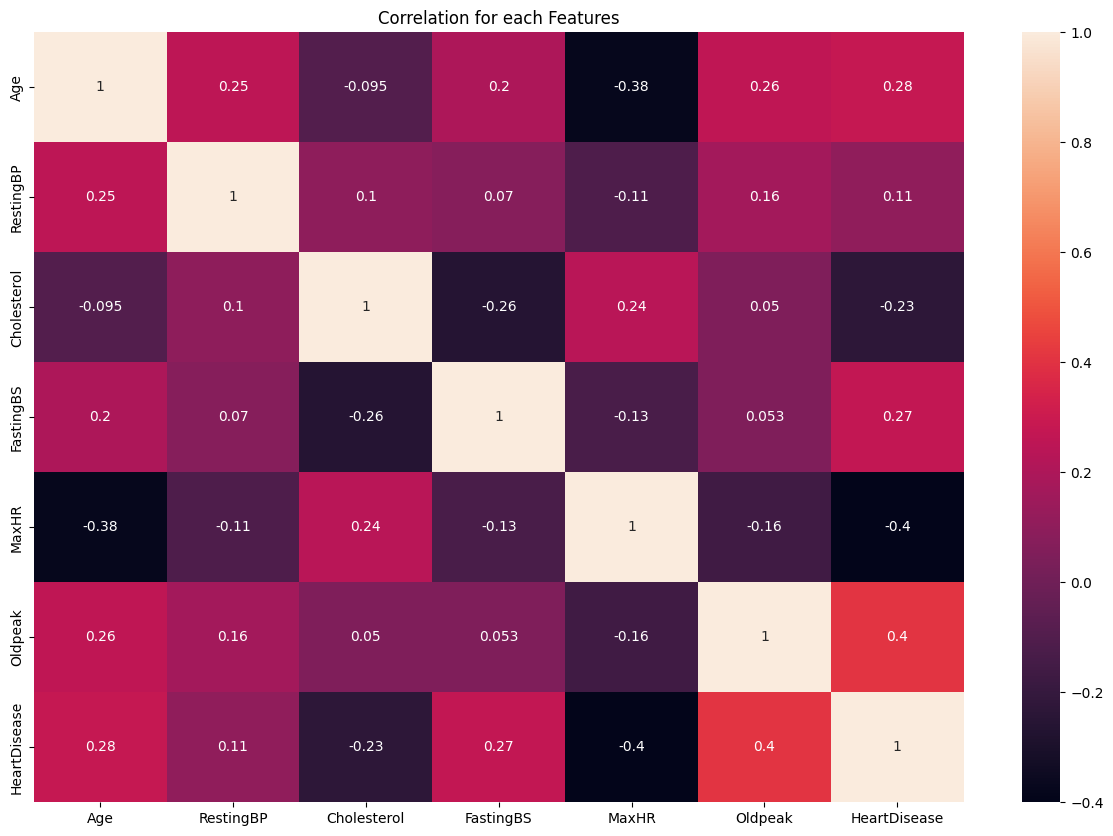

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.2g')
plt.title('Correlation for each Features')
plt.show()

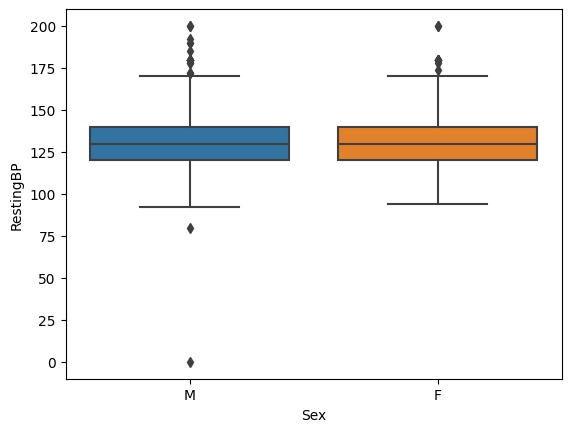

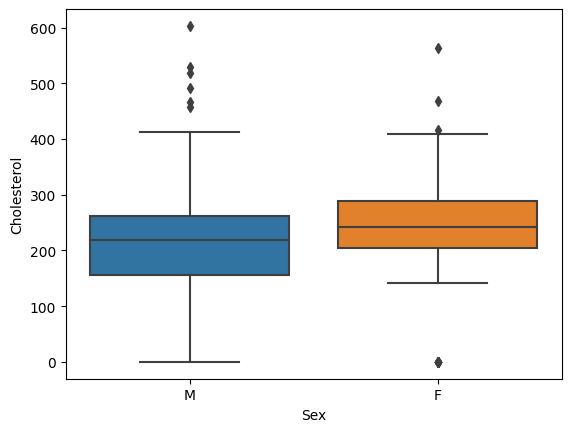

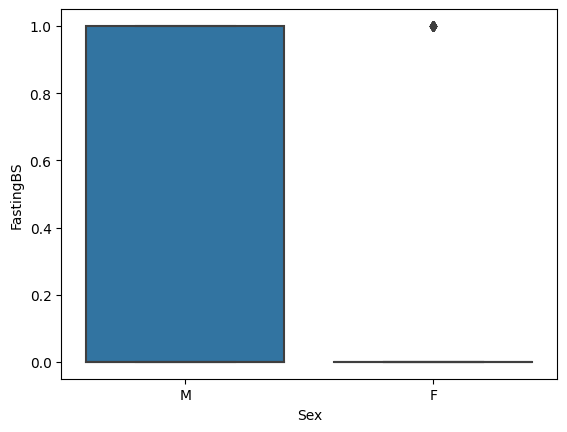

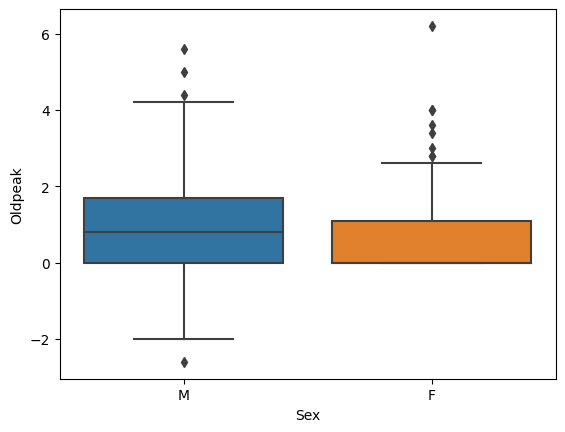

In [9]:
selected_features = ['RestingBP','Cholesterol','FastingBS', 'Oldpeak']

for i in selected_features:
    sns.boxplot(y=data[i], x=data['Sex'])
    plt.show()

# Label Encode

In [7]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
from sklearn import preprocessing

encode_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in encode_features:
    le = preprocessing.LabelEncoder()
    le.fit(data[col].unique())
    data[col] = le.transform(data[col])
    print(f'{col} : {data[col].unique()}')


Sex : [1 0]
ChestPainType : [1 2 0 3]
RestingECG : [1 2 0]
ExerciseAngina : [0 1]
ST_Slope : [2 1 0]


# Train Test Splits

In [11]:
from sklearn.model_selection import train_test_split

x = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

Remove Outliers

In [12]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [14]:
from scipy import stats
import numpy as np

selected_columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
                    'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

z_scores = np.abs(stats.zscore(x_train[selected_columns]))

threshold = 3

outlier_indices = np.where(z_scores > threshold)[0]

x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])


# Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_)

c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=10, splitter='random')


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt', min_samples_leaf=1, min_samples_split=10, splitter='random')
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=10, splitter='random')

In [17]:
tree_pred = tree.predict(x_test)

print('Accuracy Score: ', round(accuracy_score(y_test, tree_pred)* 100, 2), '%')

Accuracy Score:  80.98 %


# Suppor Vector Machine

In [19]:

from sklearn.svm import SVC

parameters = {'C': [1, 10], 
          'gamma': [0.001, 0.01, 1]}
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=parameters)
grid.fit(x_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)
     

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [0.001, 0.01, 1]})
0.7347222222222223
{'C': 10, 'gamma': 0.001}


In [20]:
svc = SVC(C = 10, gamma=0.001)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
print('Accuracy Score :', round(accuracy_score(y_test, y_pred) * 100, 2), '%')

Accuracy Score : 76.63 %


# KNN Classifier

In [21]:

from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.2826086956521739 at K = 7


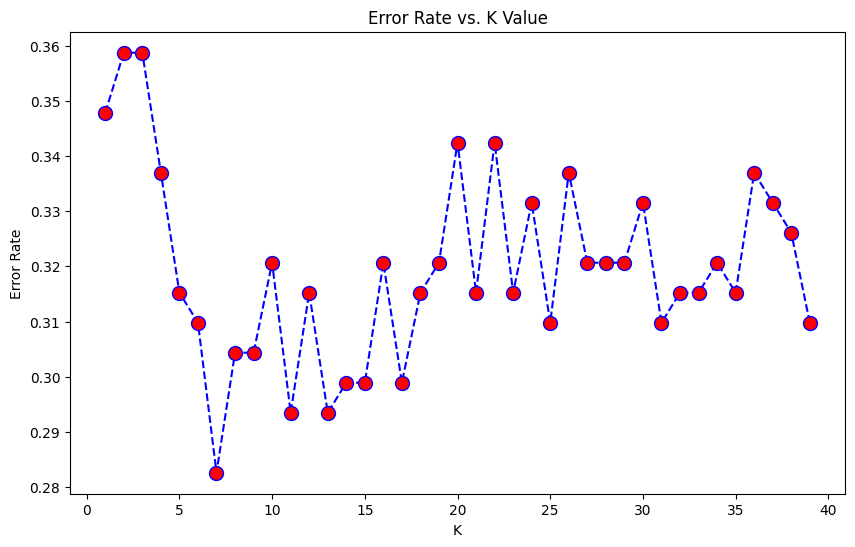

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

In [25]:
param_grid = {
    'n_neighbors' : [7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 40, 50],
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=7)


In [26]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, n_neighbors=7, weights= 'uniform')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('Accuracy Score :', round(accuracy_score(y_test, y_pred) * 100, 2), '%')

Accuracy Score : 71.74 %


# Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(gbc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
# print(grid_search.best_estimator_)
     

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'subsample': 0.8}


In [28]:
gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50, subsample=0.8)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)

print('Accuracy Score :', round(accuracy_score(y_test, y_pred) * 100, 2),'%')

Accuracy Score : 87.5 %
